### P.S: All libraries and functions used in this notebook are contained in traversal_space_train_test_split.py file.

## Traversal of the Space of train/test splits
The aim of this task is to investigate how much the performance score/metrics computed on the test set depends on the choice of train/test split proportion using a classification model.

In [1]:
import traversal_space_train_test_split as tt_split
from traversal_space_train_test_split import plt

/Users/omobolajibalogun/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Read dataset using pandas
vehicles = tt_split.pd.read_csv("../../../datasets/vehicles.csv")

In [3]:
vehicles.head()  # print the first five values of the dataset

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


## Estimator to be used: Logistic Regression
From resolving issue #2, Logistic Regression model gave the highest accuracy score, hence my reason for choosing this model to evaluate its metrics

In [4]:
# Logistic Regression model
lr = tt_split.LogisticRegression(solver="liblinear", multi_class="ovr")

### Implementing the `traversal(estimator, data)` function that will output a result of different test sizes and the different metrics used.`

In [5]:
results = tt_split.traversal(lr, vehicles)
results

,Train Size,Test Size,Accuracy Score(%),Precision(%),Recall(%),F1_Score(%)
0,0.9,0.1,77.65,78.15,77.65,77.57
1,0.8,0.2,81.18,80.93,81.18,80.69
2,0.7,0.3,80.71,81.53,80.71,80.48
3,0.6,0.4,80.24,80.76,80.24,80.00
4,0.5,0.5,80.14,79.88,80.14,79.78
5,0.4,0.6,81.50,81.30,81.50,81.11
6,0.3,0.7,80.44,80.43,80.44,79.95
7,0.2,0.8,77.84,79.19,77.84,77.19
8,0.1,0.9,73.88,74.09,73.88,73.16


## Explanations
### It should be noted that the Precision, Recall and F1 scores are weighted averages of the scores for the several vehicles (opel, bus, saab, van).
The scores show that a train/test split ratio of 0.4/0.6 respectively has given the highest accuracy score and F1 score, this is quite unusual though. 
This could be as a result of Covariate Shift in which the model has been trained on a set of feature characteristics in the train data which are different from those in the test data.

 - Precision refers to the weighted percentage of predictions that are correct.
- 0.4/0.6 train/test ratio with Precision score 81.3%, means 81.3% of the predictions are correct.
    
    
 - Recall refers to the weighted percentage(of all vehicles) of each of the postive cases caught.
- 0.4/0.6 train/test ratio with Recall score, 81.5%, means  81.5% of postive cases are caught in total(that is for all the vehicles).


 - F1 Score refers to the weighted percentage of scores in which the positive predictions made were correct.
- So, for a 0.4/0.6 train/test ratio, 81.1% of the positive predictions made are correct.

In [6]:
# creating variables for some of the columns in the dataframe.
test_size = results["Test Size"]
accuracy = results["Accuracy Score(%)"]
f1 = results["F1_Score(%)"]

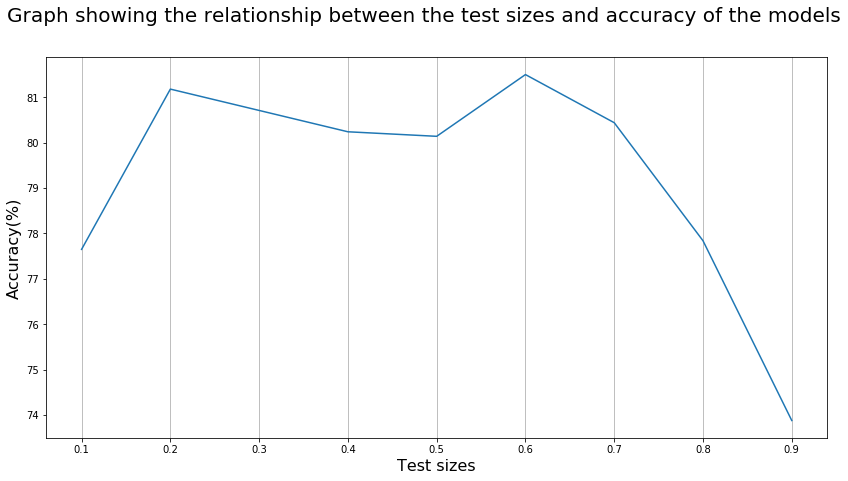

In [7]:
# Graph of accuracy score against test size
fig = plt.figure(figsize=(14, 7))
plt.plot(test_size, accuracy)
fig.suptitle(
    "Graph showing the relationship between the test sizes and accuracy of the models",
    fontsize=20,
)
plt.xlabel("Test sizes", fontsize=16)
plt.ylabel("Accuracy(%)", fontsize=16)
plt.grid(axis="x")
plt.show()

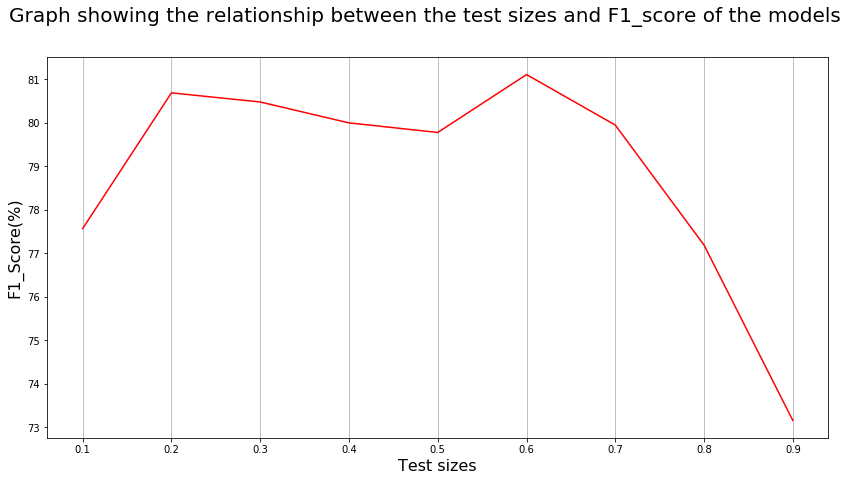

In [8]:
# Graph of F1 score against test size
fig = plt.figure(figsize=(14, 7))
plt.plot(test_size, f1, color="red")
fig.suptitle(
    "Graph showing the relationship between the test sizes and F1_score of the models",
    fontsize=20,
)
plt.xlabel("Test sizes", fontsize=16)
plt.ylabel("F1_Score(%)", fontsize=16)
plt.grid(axis="x")
plt.show()

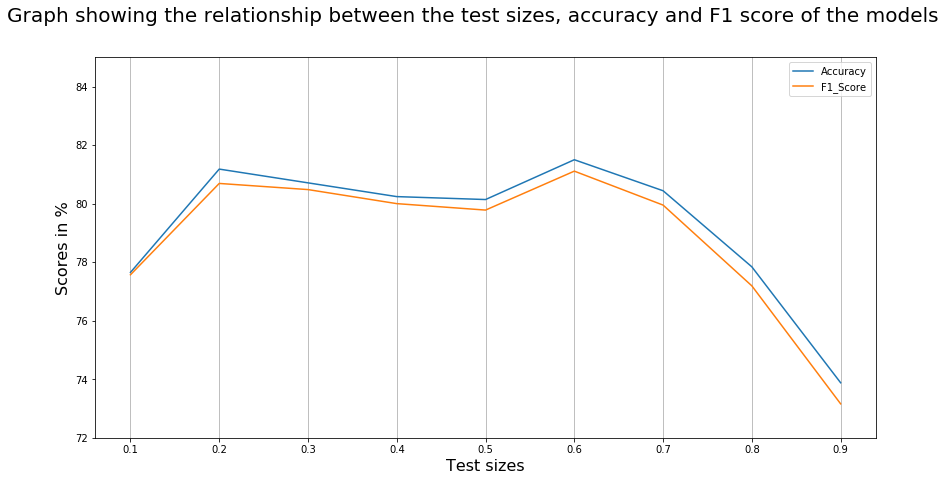

In [9]:
# Graph of Accuracy and F1_score against test size
fig = plt.figure(figsize=(14, 7))
plt.plot(test_size, accuracy, test_size, f1)
plt.legend(["Accuracy", "F1_Score"])
fig.suptitle(
    "Graph showing the relationship between the test sizes, accuracy and F1 score of the models",
    fontsize=20,
)
plt.xlabel("Test sizes", fontsize=16)
plt.ylabel("Scores in %", fontsize=16)
plt.ylim(72, 85)
plt.grid(axis="x")
plt.show()

### Conclusion
I have been able to show how the metric performance depends on our choice of train/test split ratio. 
- Looking at the graph, the accuracy scores are directly proportional to F1_scores. 
- It is also observed that these scores are much more lower for test sizes, 0.7 and above. The highest score was at a train/test split ratio of 0.4/0.6 followed by 0.8/0.2, then 0.7/0.3 respectively.

Therefore, I'll conclude that 0.4/0.6 is an anomaly(since the overall model performance gets lesser with increased test sizes). 

The general performance of this Logistic Regression model on this Vehicles dataset improves with a reduced test size, except of course in the case of using 0.1 as test size(that is, training the model on 90% of the data).